In [208]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd
import time
import json
import os 
import shap

import matplotlib.pyplot as plt 

os.chdir('/Users/adrianharris/Desktop/Messy-Data-Project')

path = os.getcwd()


In [209]:
dataset = pd.read_csv('Data/feature_eng_above_5_99s_data.csv')

In [210]:
df = dataset.drop("player", axis=1)

df.head()



,level_overall,level_atk,level_def,level_str,level_constiution,level_range,level_prayer,level_magic,level_cooking,level_wood_cutting,...,total_xp_overall,cluster,Basic_member_pure,Obby_Mauler_Pure,Black_Pure,Turmoil_Proselyte_Pure,Barrows_Pure,Anti_Pure,Summoning_Tank_Defence,Skiller_Pure
0,2898,99,99,99,99,99,99,99,99,99,...,4537236260,1,0,0,0,0,0,0,0,0
1,2898,99,99,99,99,99,99,99,99,99,...,5600000000,1,0,0,0,0,0,0,0,0
2,2898,99,99,99,99,99,99,99,99,99,...,3347652512,1,0,0,0,0,0,0,0,0
3,2898,99,99,99,99,99,99,99,99,99,...,5600000000,1,0,0,0,0,0,0,0,0
4,2898,99,99,99,99,99,99,99,99,99,...,5600000000,1,0,0,0,0,0,0,0,0


In [211]:
# split data into X and y


X = df.loc[:, ~df.columns.isin(['total_xp_overall', 'level_overall'])]
Y = df.loc[:, 'total_xp_overall']

# Training and Testing data
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [212]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [213]:
y_pred = xgbr.predict(X_test)
score = xgbr.score(X_train, y_train) 
score

0.7931217378768745

In [214]:
scores = cross_val_score(xgbr,X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.75


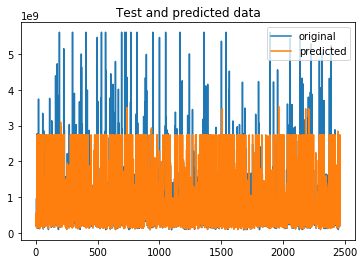

In [215]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


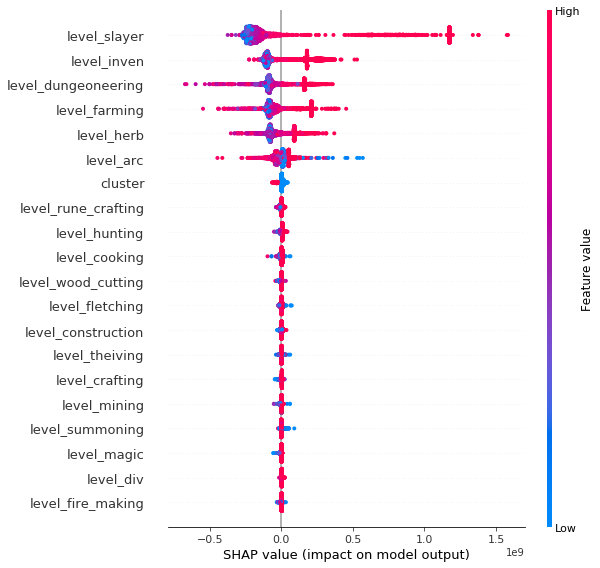

In [216]:
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(X_test)
plot = shap.summary_plot(shap_values,X_test)